<a href="https://colab.research.google.com/github/JonasHagstrom79/Tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

A classification is where you try yo classify something as on thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 10000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check the features
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [ ]:
# Check the labels
y

array([1, 0, 0, ..., 1, 0, 1])

The data is a little hard to understand right now... let´s visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


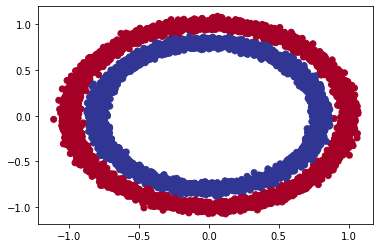

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shape of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [ ]:
X[:10], y[:10]

(array([[ 0.0464692 ,  0.82477834],
        [ 1.00506323, -0.43335153],
        [-0.58348442,  0.79452834],
        [ 0.98478298, -0.32517879],
        [ 0.82993028, -0.54722305],
        [-0.13392877,  0.77624858],
        [ 0.77919743,  0.64581132],
        [ 0.72295477,  0.17383084],
        [-0.12180665,  0.79695076],
        [ 0.84952936,  0.50567829]]), array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0]))

In [ ]:
# How many samples we're working with
len(X), len(y)

(10000, 10000)

In [ ]:
# View the first example of features and labels
X[10], y[10]

(array([-0.92287711, -0.31288882]), 0)

## Steps in modelling
First try

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)
len(X), len(X_train), len(X_test)

(10000, 8000, 2000)

In [ ]:
import tensorflow as tf

# Build a neural network to fit the data
tf.random.set_seed(42)

# 1. Create a model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="min", patience=10)
first_model = tf.keras.Sequential([
  tf.keras.Input(shape = 2),
  tf.keras.layers.Dense(100, activation = "relu"),
  #tf.keras.layers.Dense(100),
  #tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
first_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

# 3. Fit the model
history = first_model.fit(X_train, y_train, 
                          #X, y,
                          epochs=10000, callbacks=[callback])

# 4. Evaluate the model
first_model.evaluate(X_test, y_test)

Epoch 1/10000
250/250 [==============================] - 2s 4ms/step - loss: 0.6949 - accuracy: 0.4976
Epoch 2/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6863 - accuracy: 0.4974
Epoch 3/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.5045
Epoch 4/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.5665
Epoch 5/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6591 - accuracy: 0.7505
Epoch 6/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6468 - accuracy: 0.8911
Epoch 7/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6333 - accuracy: 0.9345
Epoch 8/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6191 - accuracy: 0.9621
Epoch 9/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6037 - accuracy: 0.9799
Epoch 10/10000
250/250 [==============================] - 1s 4ms/step - l

[0.5448473691940308, 0.9990000128746033]

Text(0.5, 0, 'epochs')

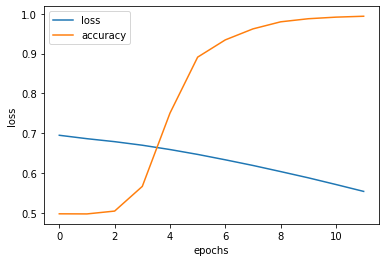

In [ ]:
# Plot history
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Save the model
first_model.save("binary_classification_model.h5")

In [ ]:
# Download the model from Google Colab
from google.colab import files
files.download("/content/binary_classification_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model 
model_2.fit(X, y,epochs=5)

Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.8730 - accuracy: 0.4962
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4964
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.4997


In [ ]:
# Lets try and improve our model by training for longer..
model_2.fit(X, y, epochs=200)
model_2.evaluate(X, y)

Epoch 1/200
313/313 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.4958
Epoch 2/200
313/313 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4954
Epoch 3/200
313/313 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4997
Epoch 6/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4953
Epoch 7/200
313/313 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.4883
Epoch 8/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4974
Epoch 9/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4977
Epoch 10/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accura

[0.6936948299407959, 0.5004000067710876]

Since we're working on a binary classification problem and our model is getting around 50% accuaracy... it's performing as it's guessing 🇸

Try to add an extra layer?

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7659 - accuracy: 0.5057
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4978
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4989
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5024
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5007
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5011
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4919
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4893
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5031
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accura

In [ ]:
# 4. Evaluate the model(ON THE SAME DATA WE TRAINED ON, BIG NO-NO)
model_3.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932647824287415, 0.5]

In [ ]:
# There are 5K of each color, not that good neural network :P
circles["label"].value_counts()

1    5000
0    5000
Name: label, dtype: int64

## Improving our model

1. Create a model - more layers and hidden units
2. Compile a model - choose a diffirent optimization function
3. Fitting a model - more epochs

## Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create te model
model_4 =  tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]    
)

# 3. Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9536 - accuracy: 0.4919
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5005
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4941
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4923
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5028
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4941
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4926
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4978
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5006
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accura

In [ ]:
# 4. Evaluate the model, NOT IDEAL TO EVALUATE ON THE SAME DATASET WE'RE TRAINING ON.. :P
model_4.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934003829956055, 0.5]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in trained model, features (X) and labels (y)
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


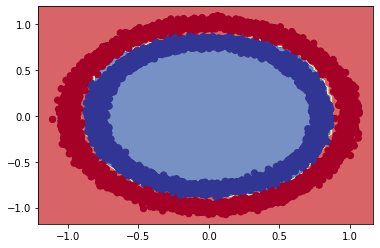

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(first_model, X, y)  


In [ ]:
# Let's see if out model can be used for a regresion problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X +100 (Thats the relationship between X and Y)

# Split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

We are working on a regression problem

To compile the model we need to re-write `model_4` since its for a binary classification problem


In [ ]:
# Random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

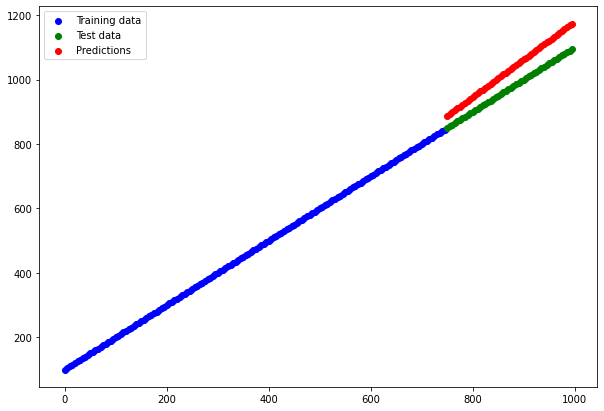

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                           
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy, # or as string "binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(#tf.expand_dims(X, axis=-1), y, epochs=100)
                      X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4834
E

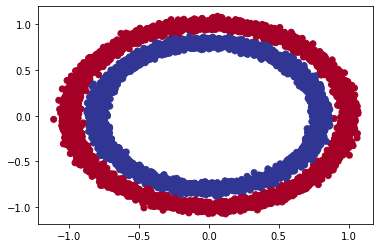

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu); # cm = ColorMap

doing binary classifcation...


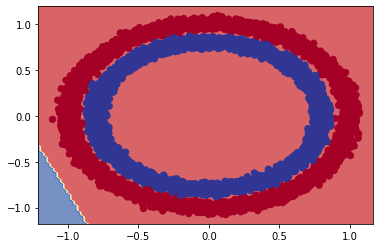

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4834
E

## Test own variant

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_playground = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  #tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh), 
  #Should be one neuron in output layer since its a binary classification problem
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) #Activation in output layer for binary classification                             
])

# 2. Compile the model
model_playground.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_playground.fit(X, y, 
                               #epochs=1000)
                               epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.5050
Epoch 2/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5266
Epoch 3/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5596
Epoch 4/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5793
Epoch 5/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.6537
Epoch 6/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6701 - accuracy: 0.6801
Epoch 7/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.8119
Epoch 8/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6253 - accuracy: 0.8462
Epoch 9/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5872 - accuracy: 0.9108
Epoch 10/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.9442
E

In [ ]:
# Evaluate
model_playground.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 6.1892e-04 - accuracy: 0.9999


[0.0006189190316945314, 0.9998999834060669]

doing binary classifcation...


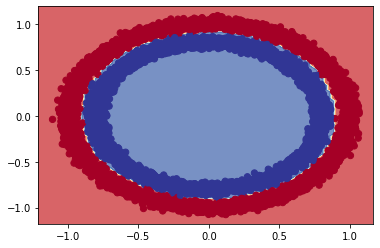

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_playground,
                       X=X,
                       y=y)

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Build the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  # Add a layer(output) for binary classification
  tf.keras.layers.Dense(1, activation="sigmoid")            
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, 
                      #epochs=100)
                      epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.5317
Epoch 2/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6730 - accuracy: 0.5588
Epoch 3/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6664 - accuracy: 0.5636
Epoch 4/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6592 - accuracy: 0.5767
Epoch 5/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6460 - accuracy: 0.6003
Epoch 6/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6219 - accuracy: 0.6858
Epoch 7/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5770 - accuracy: 0.7578
Epoch 8/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.8630
Epoch 9/250
313/313 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.9629
Epoch 10/250
313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.9817
E

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9949


[0.013585487380623817, 0.9948999881744385]

doing binary classifcation...


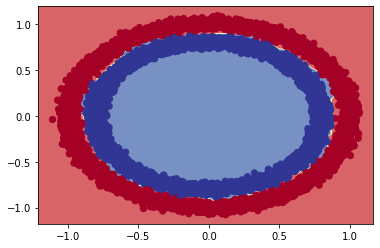

In [ ]:
# How does our model predictions look?
plot_decision_boundary(model_7, X, y)

🤔 **Question:** Whats wrong with the predictions we've made? Are the model really evaluated correctly?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

### Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)

import tensorflow as tf

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

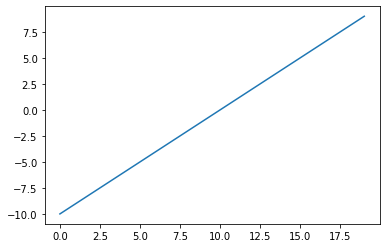

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

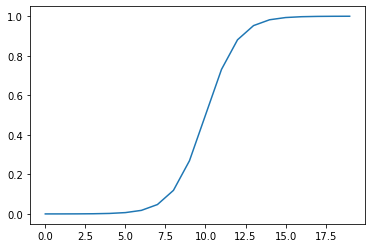

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

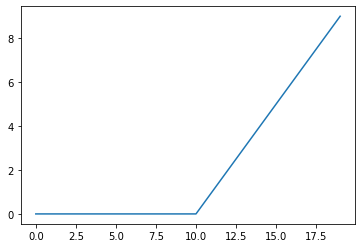

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

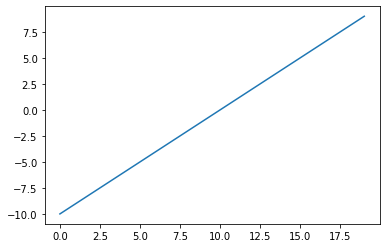

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Any changes at all?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
# Let's recreate the Tanh function
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
 
# Pass in our toy tensor
tanh(A)

array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)

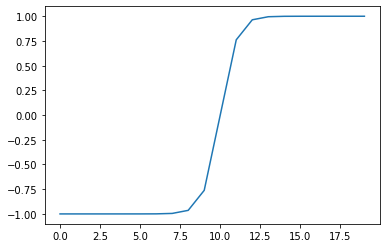

In [ ]:
# Plot our toy tensor transformed by Tanh
plt.plot(tanh(A))

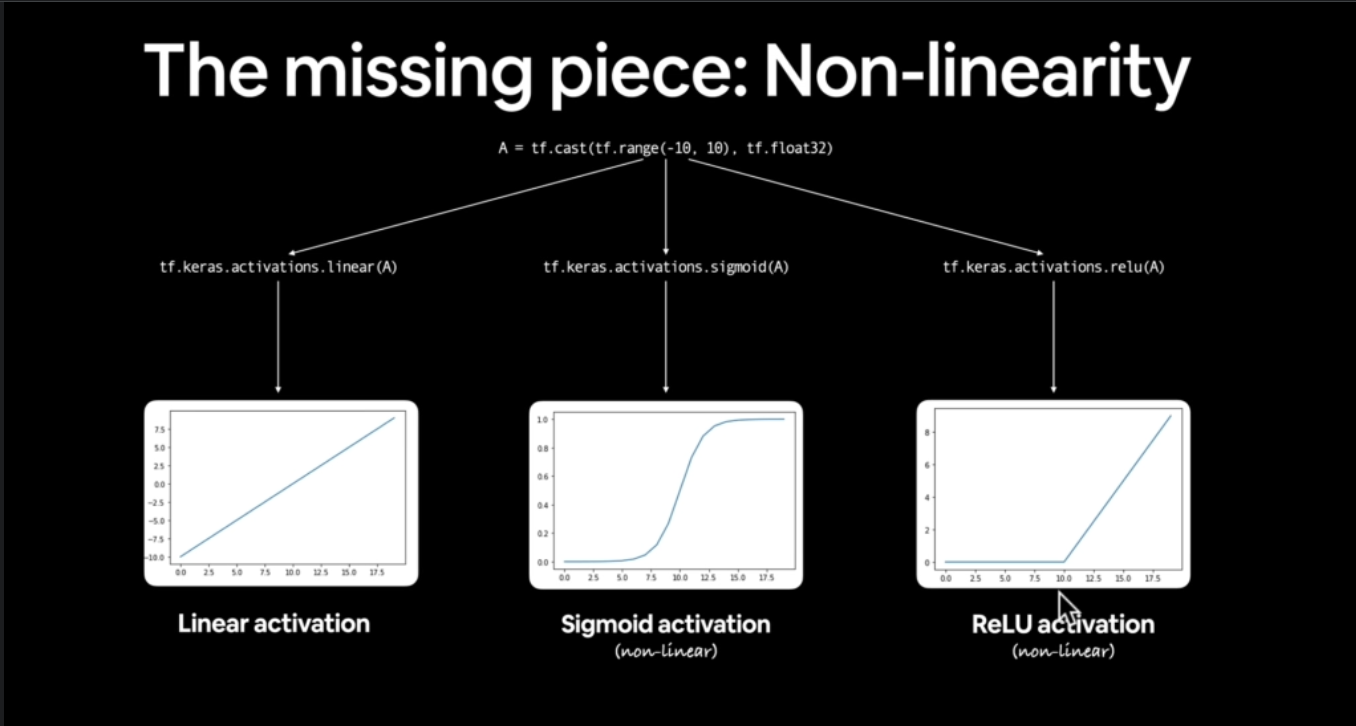

Neural networks uses a combination of linear and non-linear activations to find patterns in data.

### Evaluating and improving our classification

So far ew've been training and testing on the same dataset..

**Big NO NO in machine learning**

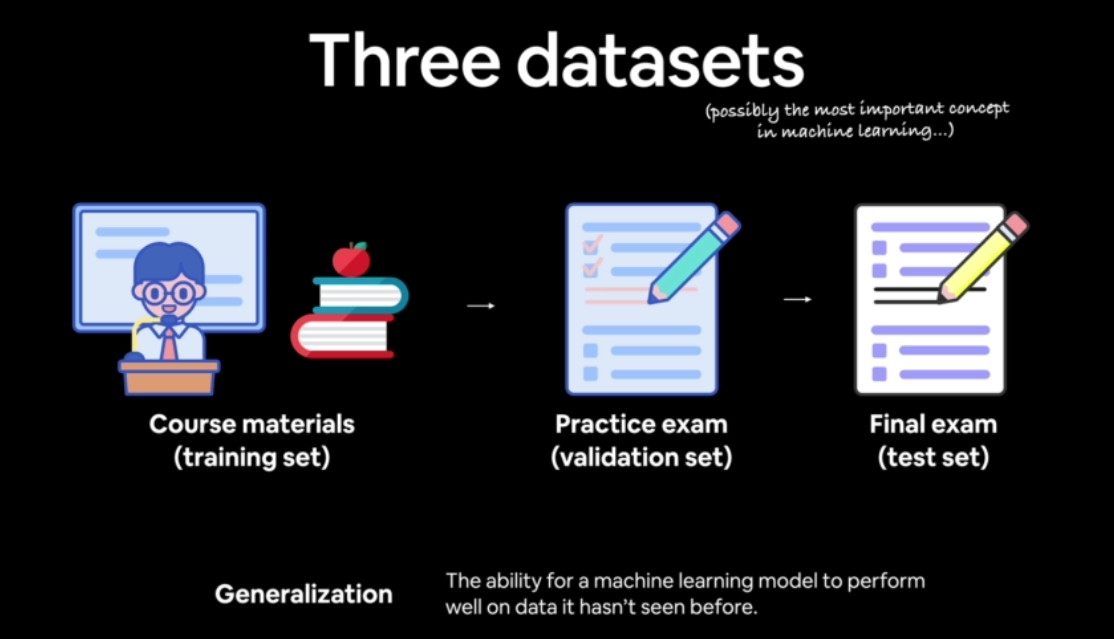


In [ ]:
# Create a training and test set
# Check how many examples we have

len(X)

10000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:8000], y[:8000] # 80% training samples, first 8k samples
X_test, y_test = X[8000:], y[8000:] # 20%, last 2K samples

# Check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [ ]:
# Let's create a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # Increased by 10 times from previous model
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.6060
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8786
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9875
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9909
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9944
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9931
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9937
Epoch 8/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9946
Epoch 9/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9941
Epoch 10/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 11/2

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9890


[0.023463428020477295, 0.9890000224113464]

doing binary classifcation...
doing binary classifcation...


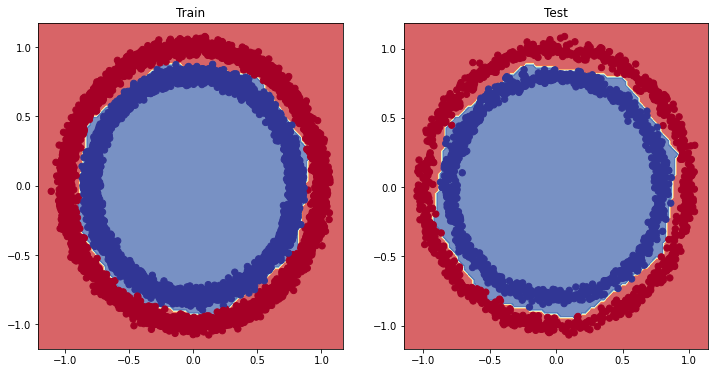

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1) #Rows, Colums, The first value
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2) #Rows, Colums, The second plot
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
history.history

{'accuracy': [0.6060000061988831,
  0.8786249756813049,
  0.987500011920929,
  0.9908750057220459,
  0.9943749904632568,
  0.9931250214576721,
  0.9937499761581421,
  0.9946249723434448,
  0.9941250085830688,
  0.9931250214576721,
  0.9936249852180481,
  0.9934999942779541,
  0.9928749799728394,
  0.9955000281333923,
  0.9940000176429749,
  0.9936249852180481,
  0.9925000071525574,
  0.9946249723434448,
  0.9940000176429749,
  0.9940000176429749,
  0.9953749775886536,
  0.9929999709129333,
  0.9940000176429749,
  0.9926249980926514,
  0.9936249852180481],
 'loss': [0.6539056897163391,
  0.36739861965179443,
  0.10284443944692612,
  0.05290163680911064,
  0.0329742506146431,
  0.02739671617746353,
  0.024848969653248787,
  0.021388519555330276,
  0.020063024014234543,
  0.019906554371118546,
  0.021084660664200783,
  0.0195649191737175,
  0.018375743180513382,
  0.014925346709787846,
  0.016957448795437813,
  0.01810278184711933,
  0.02044244110584259,
  0.014878746122121811,
  0.015512

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.653906,0.606000
1,0.367399,0.878625
2,0.102844,0.987500
3,0.052902,0.990875
4,0.032974,0.994375
5,0.027397,0.993125
6,0.024849,0.993750
7,0.021389,0.994625
8,0.020063,0.994125
9,0.019907,0.993125


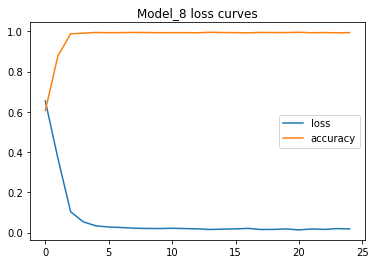

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑**Note:** The loss is how wrong our model is. For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can thnk of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Increase the lr by 10 to the power of epoch divided by 20 every epoch

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs= 100, callbacks=[lr_scheduler]) # lr comes as a list

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5090 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5156 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5264 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5259 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5330 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5360 - lr: 1.7783e-04
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5396 - lr: 1.9953e-04
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5436 - lr: 2.2387e-04
Epoch 9/100
250/250 [==============================] - 0

##"*If in doubt, code it out"* - ^^

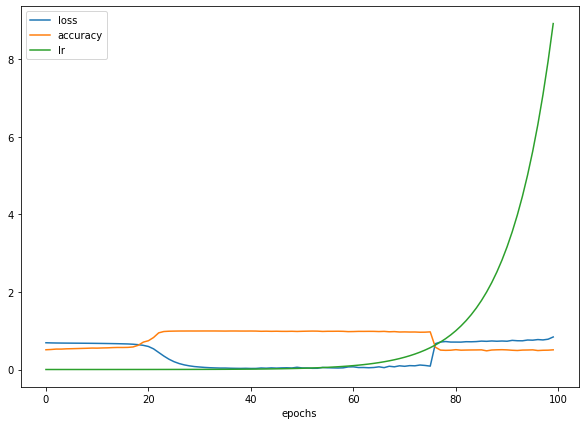

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

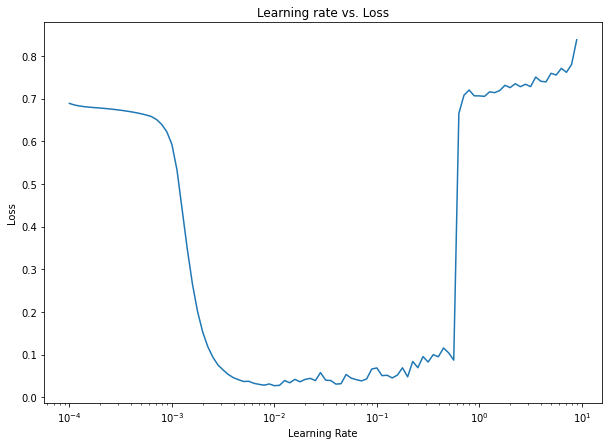

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
#lrs
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

## The ideal Learning rate is about ten times smaller than the lowest point on the curve

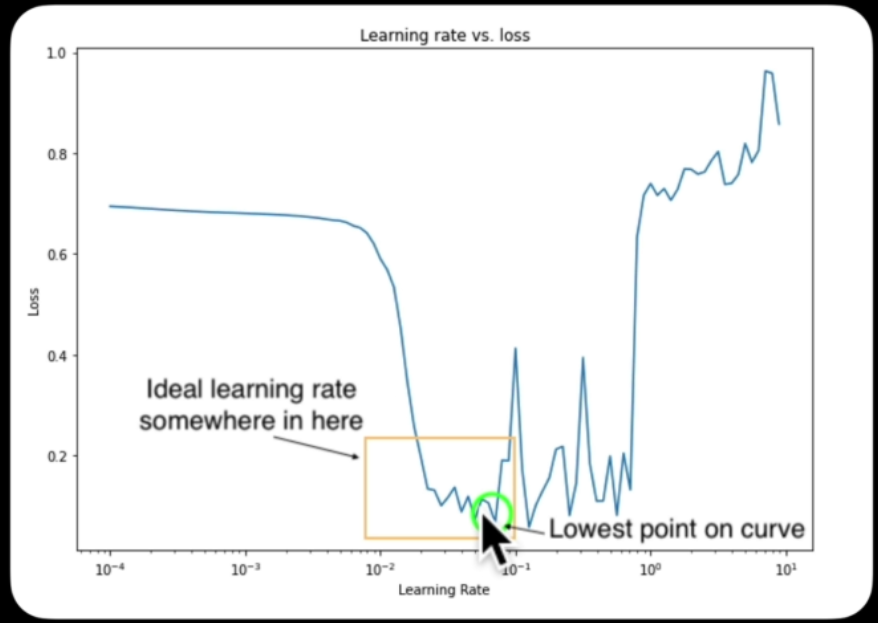

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
len(lrs)

100

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  metrics=["accuracy"])

# Fit the model for 20 epochs ( 5 less than the previous)

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7308
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9935
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9918
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9843
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9927
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9910
Epoch 11/2

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9950


[0.010959010571241379, 0.9950000047683716]

In [ ]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9890


[0.023463428020477295, 0.9890000224113464]

doing binary classifcation...
doing binary classifcation...


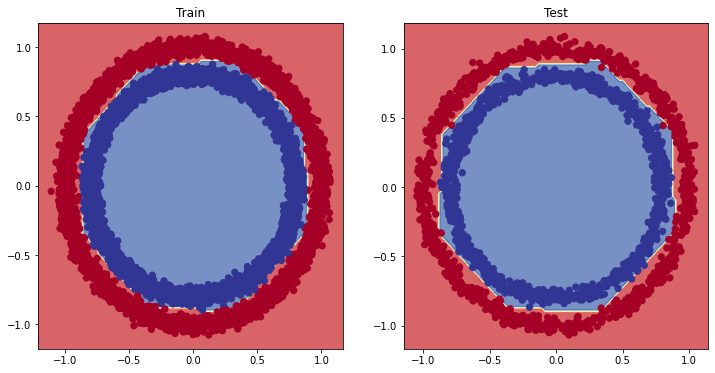

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### Classification evaluation methods

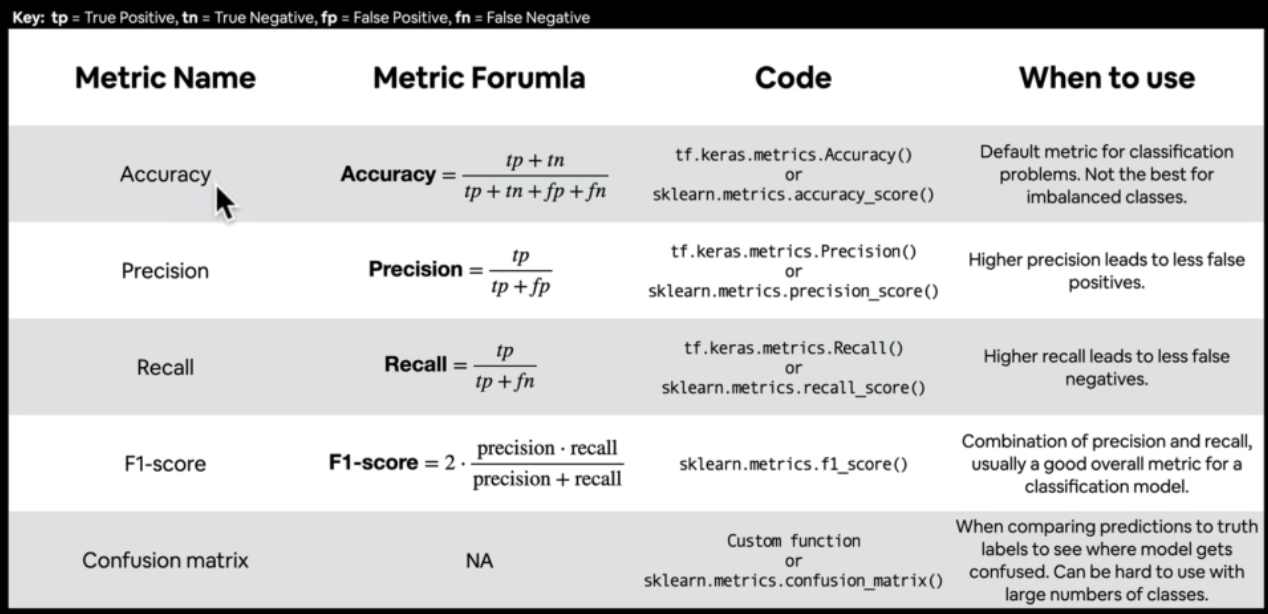

## More classification evaluating methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuarcy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from [SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

63/63 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9950
Model loss on the test set: 0.010959010571241379
Model accuracy on the test set: 99.50%


## How about a confusion matrix?

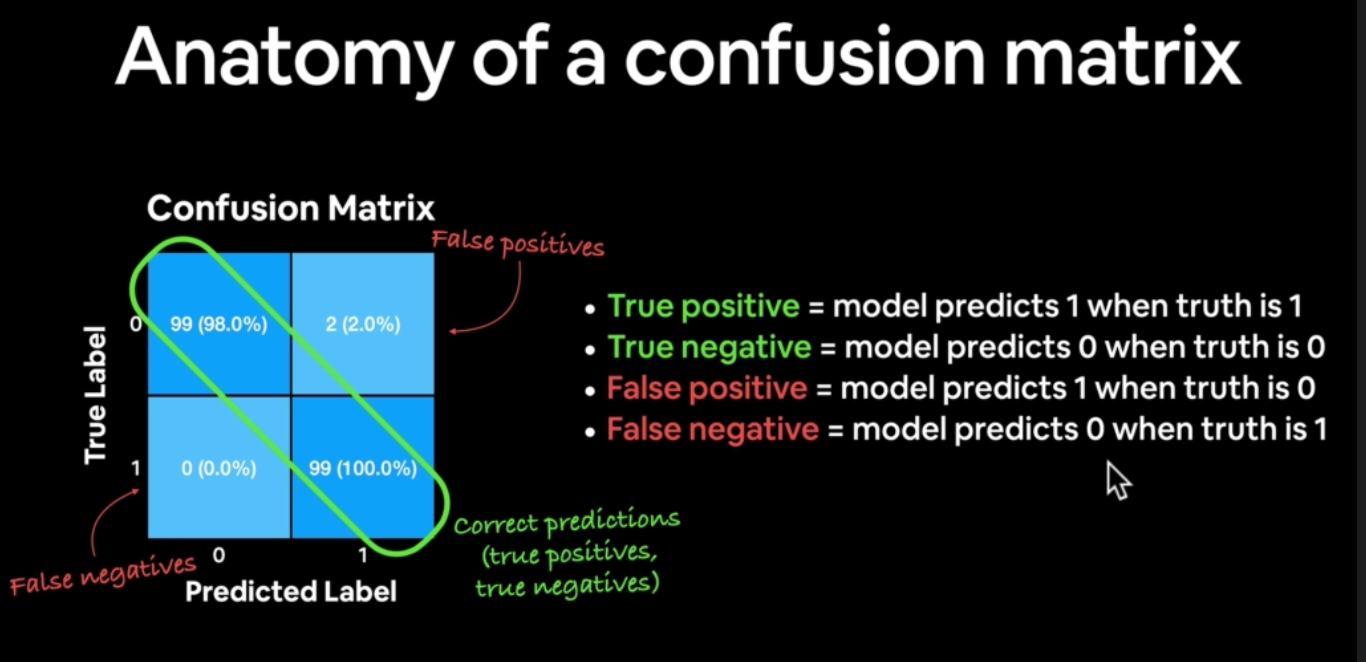

In [ ]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
#confusion_matrix(y_test, y_preds) # Wont work as the data is diferent

NameError: ignored

In [ ]:
y_test[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_preds[:10]

array([[1.8226266e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.2933397e-06],
       [8.6668358e-08],
       [7.2157331e-06],
       [3.8580079e-06],
       [9.9999285e-01],
       [2.4497626e-06],
       [9.9901259e-01]], dtype=float32)

**Hmmm..** looks like the predictions array has come out in **prediction probability** form..
the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary forat and view the first 10
tf.round(y_preds)[:10]

NameError: ignored

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[ 974,    6],
       [   4, 1016]])

## How about making the confusion matrix better than above?

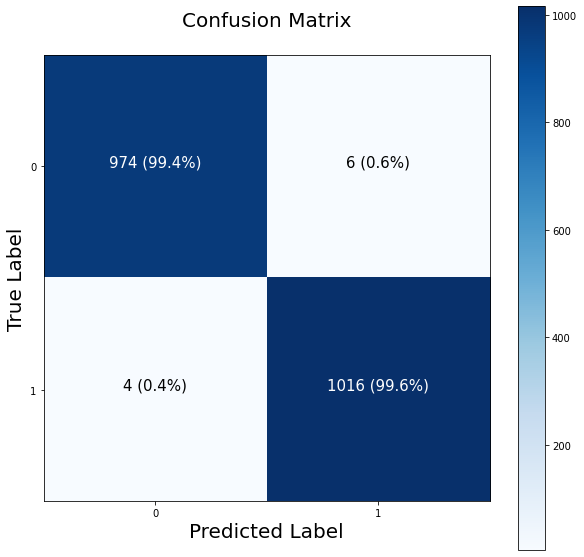

In [ ]:
# Note: the confusion matrix code is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create the matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
 labels = classes
else:
  labels = np.arange(cm.shape[0]) 

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification.**
* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multiclass classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
# Get the data ready
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

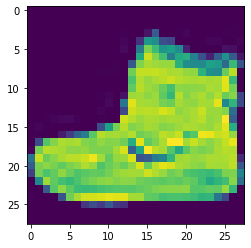

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]); # Training label 9 is an ankleboot

In [ ]:
# Check out samples label
train_labels[0]

9

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

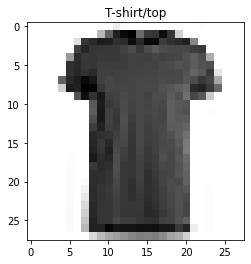

In [ ]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

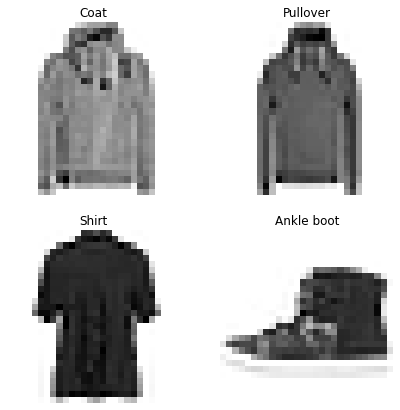

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model

* If your labels are one-hot encoded, use CategoricalCrossentropy()
* If your labels are integer form, use SparseCategoricalCrossentropy()

##Small reminder..^^
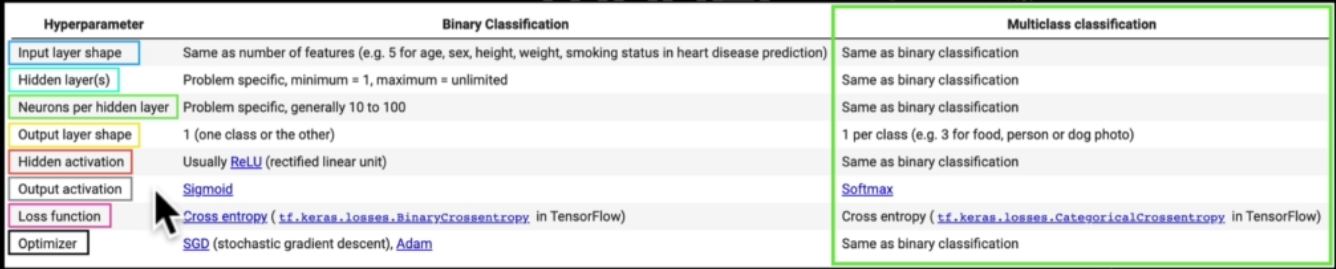

In [ ]:
# Our data needs to be flattened (from 28 * 28 to one long vector(None, 784))
# To be able to pass it through the other layers
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Were does 784 comes from?
28 * 28

784

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# Try the normalized data 
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                         train_labels,
                         epochs=10,
                         validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

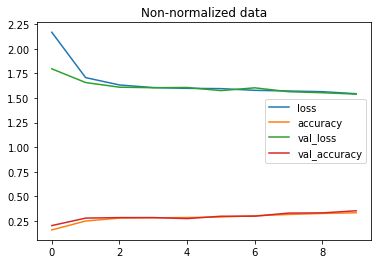

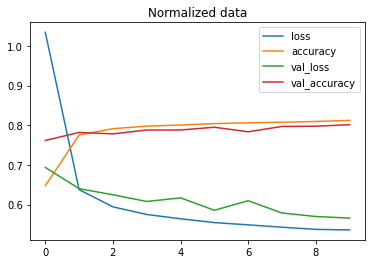

In [ ]:
# Compare the loss curves between normalized data && non normalized data
import pandas as pd

# Plot non-normalized data loss curved
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're coparing models, it's important to make sure you're comparig them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                         train_labels,
                         epochs=40,
                         validation_data=(test_data_norm, test_labels),
                         callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

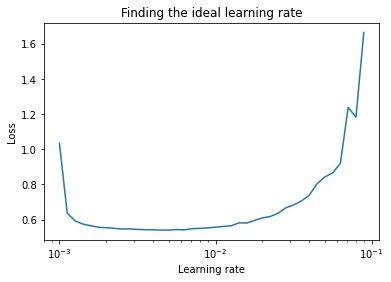

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3
# Adam's default lr seems to be ideal

0.001

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy if labels are in one-hot encoded form
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve it's results (by training it for longer or changing the archtecture)
* Save and export it for use in an application

Lets go through the top 2^^


In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  '''Insert doc-string here'''
  
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create the matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0]) 

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])] # gives numpy = 9 && gives ankle boot

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

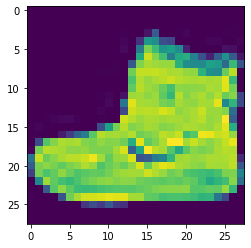

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]); # Training label 9 is an ankleboot

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Our predictions now are in the same format as our test labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Display the result with sklearns confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

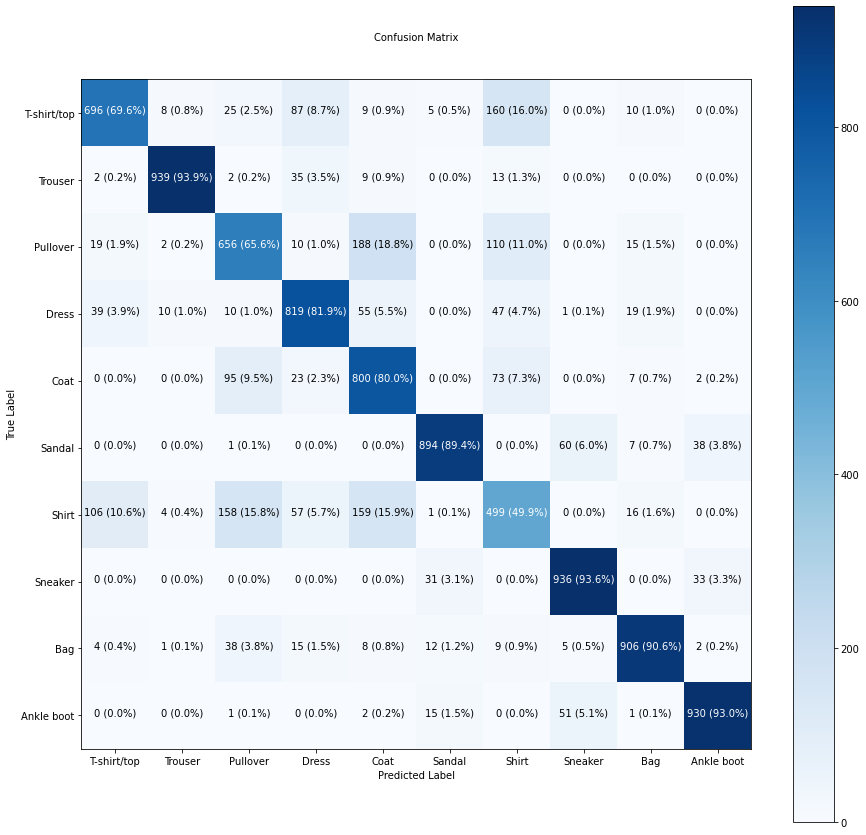

In [ ]:
#import numpy as np # Här och upp till model_14
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

Create a function for:
* Plot a random image
* Make a prediction of said image
* Label the plot with the truth label  the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random int
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {}".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color) # Set the color to gree or red based if prediction is right or wrong

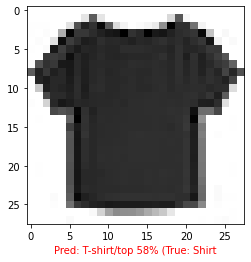

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model_14,
                  test_data_norm,
                  test_labels,
                  class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
28 * 28

784

dtype=float32), (784, 4)) is the 28 * 28 (784) and 4 (4 hidden units) that the layer uses to find patterns in the data
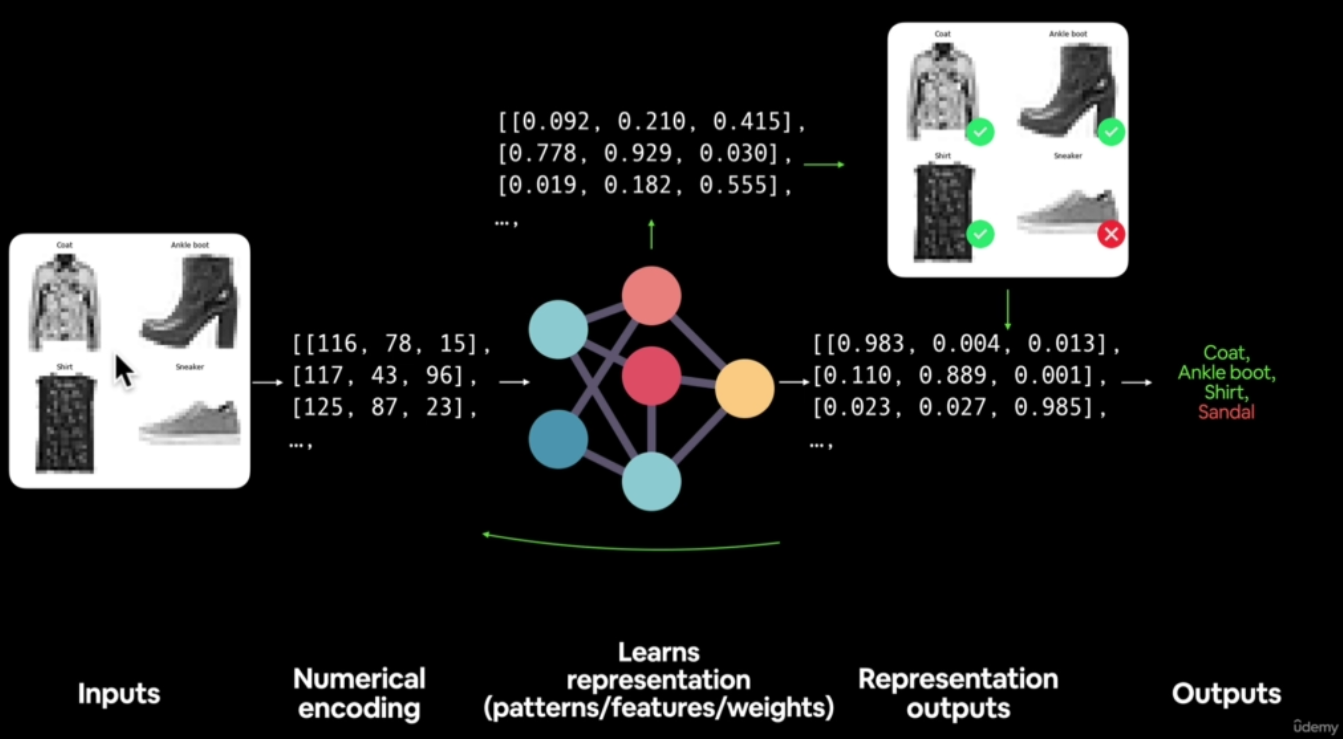

In [ ]:
model_14.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes, for every hidden unit in the layre(4), it has a bias vector
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

This bias vector get initalized as zeros (at least in the case of TensorFlow Dense layer).

The bias vector dictates howw much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


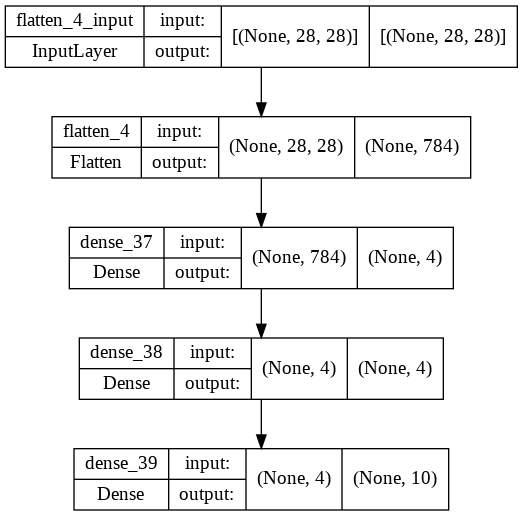

In [ ]:
# Lets check out another way of veiwing our deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## Next check out exercises and extra curriculum...

1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. tensorflow playground example neural network Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.
3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.


## 2

In [ ]:
# Create the data
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

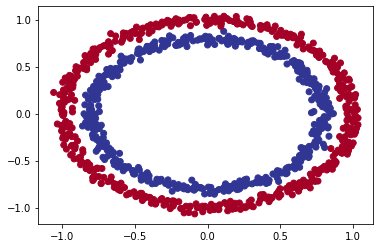

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Split data into thest and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X), len(X_train), len(X_test)

(1000, 800, 200)

In [ ]:
# Import libraries
import tensorflow as tf

# Set seed
tf.random.set_seed(42)

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="max", patience=10)

# Create the model
model_task_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") #sigmoid or softmax?
])

# Compile the model
model_task_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr=0.001),
                     metrics=["accuracy"])

# Fit the model
history_task_2 = model_task_2.fit(X_train,
                                  y_train,
                                  epochs=1000,
                                  callbacks=[callback])

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4900
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4988
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5850
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5638
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5850
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5437
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5475
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5713
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5650
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6037
Epoch 11/100

In [ ]:
# Evaluate the model
model_task_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 1.0000


[0.03141056001186371, 1.0]

Text(0.5, 0, 'epochs')

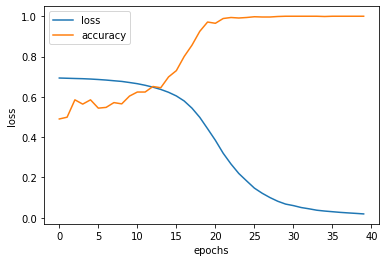

In [ ]:
# Plot the history
import pandas as pd
pd.DataFrame(history_task_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

doing binary classifcation...
doing binary classifcation...


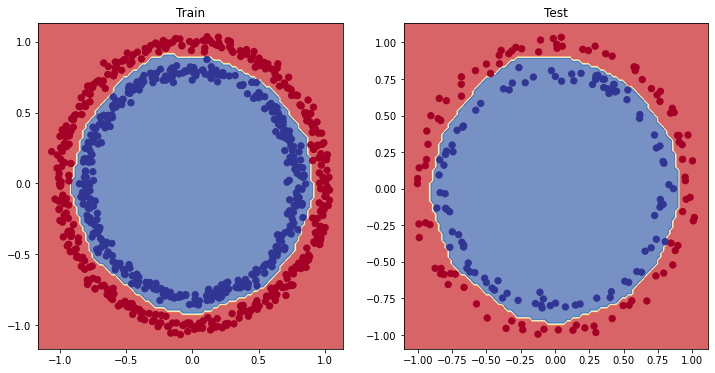

In [ ]:
# Plot decision boudaries from Training and Test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_task_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_task_2, X=X_test, y=y_test)
plt.show()


## 3

In [ ]:
# Create the dataset
from sklearn.datasets import make_moons

# Create samples
n_samples = 1000

# Create the moons
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

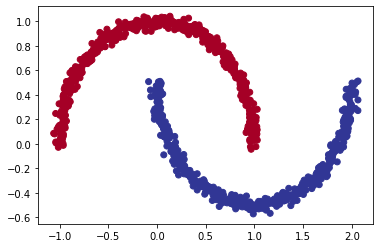

In [ ]:
# Visulize the data
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X), len(X_train), len(X_test)

(1000, 800, 200)

In [ ]:
# Set seed
tf.random.set_seed(42)

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="max", patience=10)

# Create the model
model_task_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_task_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr=0.001),
                     metrics=["accuracy"])

# Fit the model
history_task_3 = model_task_3.fit(X_train,
                                  y_train,
                                  epochs=1000,
                                  callbacks=[callback])

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.4913
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.7412
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.7750
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.7962
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.8075
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.8350
Epoch 7/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8575
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8875
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8963
Epoch 10/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.9125
Epoch 11/100

In [ ]:
# Evaluate the model
model_task_3.evaluate(X_test, y_test)

7/7 [==============================] - 1s 4ms/step - loss: 0.0054 - accuracy: 1.0000


[0.005390323232859373, 1.0]

Text(0.5, 0, 'epochs')

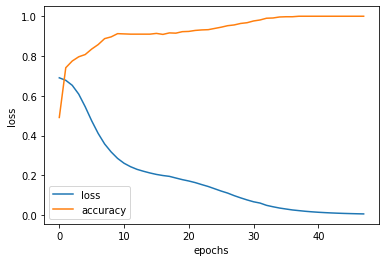

In [ ]:
# Plot the history
pd.DataFrame(history_task_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

doing binary classifcation...
doing binary classifcation...


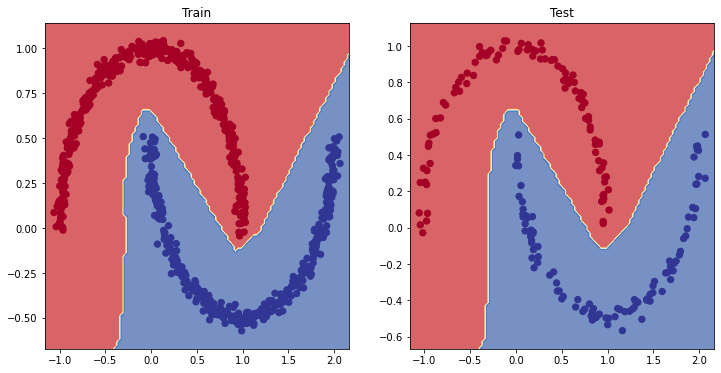

In [ ]:
# Plot desiscion boundaries from training and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_task_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_task_3, X=X_test, y=y_test)
plt.show()

In [ ]:
# Save the model
#model_task_3.save("best_model_Task_Three_HDF5_fromat.h5")

In [ ]:
# Download the model from Google Colab
#from google.colab import files
#files.download("/content/best_model_Task_Three_HDF5_fromat.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4

In [1]:
# Get the data ready
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
num_classes = 10

In [9]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

In [10]:
# Check the shapes of the split
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Our data needs to be flattened (from 28 * 28 to one long vector(None, 784))
# To be able to pass it through the other layers
#flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
#flatten_model.output_shape

(None, 784)

In [4]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
#train_data_norm = train_data / 255.0
#test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
#train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [11]:
# Create the model, we already know the best learning rate, I will add more hidden layers and neurons

# Set random seed
tf.random.set_seed(42)

# Create the callback
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5)

# Gradually reduce the learning rate during training
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=1e4//500*1000, # First try, decrease the lr to 1/2 of base rate at 1000 epochs, 1/3 qt 2000, and so on
    #decay_steps= (lambda epoch : 1e-4 * 10**(epoch/20)), # decrease the lr by 10 to the power of epoch divided by 20 every epoch
    decay_rate=1,
    staircase=False
)

# Create the model
model_task_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')                              

])

# Compile the model
model_task_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr_schedule),
                     metrics=["accuracy"])

# Fit the model
history_task_4 = model_task_4.fit(train_data_norm,
                                  train_labels,
                                  epochs=10, #1000
                                  callbacks=[callback],
                                  batch_size=64,
                                  validation_data=(test_data_norm, test_labels))


Epoch 1/10
938/938 [==============================] - 91s 95ms/step - loss: 0.5999 - accuracy: 0.7784 - val_loss: 0.3930 - val_accuracy: 0.8578
Epoch 2/10
938/938 [==============================] - 86s 92ms/step - loss: 0.4158 - accuracy: 0.8486 - val_loss: 0.3456 - val_accuracy: 0.8728
Epoch 3/10
938/938 [==============================] - 93s 99ms/step - loss: 0.3712 - accuracy: 0.8666 - val_loss: 0.3223 - val_accuracy: 0.8795
Epoch 4/10
938/938 [==============================] - 89s 95ms/step - loss: 0.3439 - accuracy: 0.8748 - val_loss: 0.2936 - val_accuracy: 0.8907
Epoch 5/10
938/938 [==============================] - 79s 84ms/step - loss: 0.3204 - accuracy: 0.8819 - val_loss: 0.2824 - val_accuracy: 0.8969
Epoch 6/10
938/938 [==============================] - 79s 84ms/step - loss: 0.3036 - accuracy: 0.8895 - val_loss: 0.2671 - val_accuracy: 0.9017
Epoch 7/10
938/938 [==============================] - 79s 84ms/step - loss: 0.2940 - accuracy: 0.8918 - val_loss: 0.2683 - val_accuracy:

In [12]:
# Function for the confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [14]:
# Making predictions with our model
y_probs = model_task_4.predict(test_data) # y_probs

# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1) # y_probs

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Our predictions now are in the same format as our test labels
#test_labels

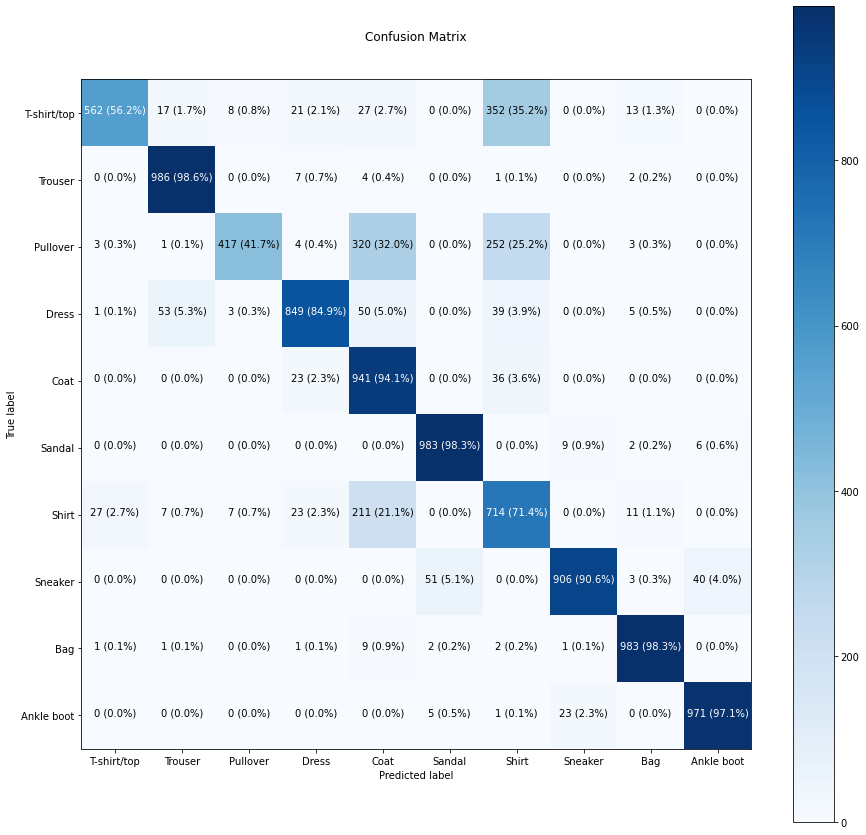

In [17]:
import matplotlib.pyplot as plt
import numpy as np 
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

Text(0.5, 0, 'epochs')

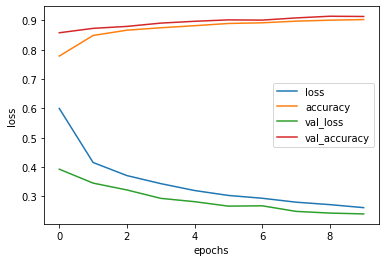

In [18]:
# Plot the history
import pandas as pd
pd.DataFrame(history_task_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model_task_4,
                  test_data_norm,
                  test_labels,
                  class_names)

In [ ]:
# Save the model
model_task_4.save("best_model_Task_Four_HDF5_format.h5")

In [ ]:
# Download the model from Google Colab
files.download("/content/best_model_Task_Four_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5

In [5]:
# Implementing a softmax function 
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns: 
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x , dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the forumale
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x , axis = 0)

In [6]:
# Creating sample tensor 
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [7]:
# Applying our softmax function 
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

## 6

In [ ]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

## 7

In [ ]:
# Making predictions 
preds = simple_model.predict(test_images)

In [ ]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show

In [ ]:
# Using our function
plot_prediction_images()